# Исследование факторов, влияющих на успешность видеоигр

**Цель исследования -** выявить закономерности, влияющие на коммерческий успех видеоигр.
<br>

**Ход исследования:**
1. Обзор данных: загрузка датафрейма и первичное знакомство с его содержанием, построение общей гистрограммы.
2. Предобработка данных: приведение столбцов к нижнему регистру, преобразование типов данных, поиск и обработка пропущенных значений, проверка на явные дубликаты, добавление нового столбца. 
3. Исследовательский анализ данных: более подробное изучение основных характеристик игр, выявление факторов, влияющих на их успех, определение актуального периода в рамках данного исследования и лидируюших платформ, вычисление "срока жизни" платформ.
4. Составление портрета пользователя каждого региона: определение самых популярных платформ и жанров в каждом из регионов, оценка влияния рейтинга ESRB на продажи в каждом из регионов.
5. Проверка гипотез: 
                   1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
                   2) Средние пользовательские рейтинги жанров Action и Sports разные.
6. Выводы и рекомендации.

## Открытие файла с данными и изучение общей информации

In [ ]:
#импортирую нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st

In [ ]:
#загружаю данные
df = pd.read_csv('/datasets/games.csv')
pd.set_option('display.max_columns', None)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16665,Sweet Honey Coming,PS2,2009.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16666,Psychic Detective,PS,1995.0,Adventure,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16667,Hanasaku Manimani,PSV,2014.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16669,Super Robot Taisen: Original Generation,GBA,2002.0,Role-Playing,0.01,0.00,0.00,0.0,72.0,tbd,T
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16671,Kanokon: Esuii,PS2,2008.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016.0,Action,0.01,0.00,0.00,0.0,NaN,tbd,M
16673,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,0.01,0.00,0.00,0.0,81.0,8.8,M
16674,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.0,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


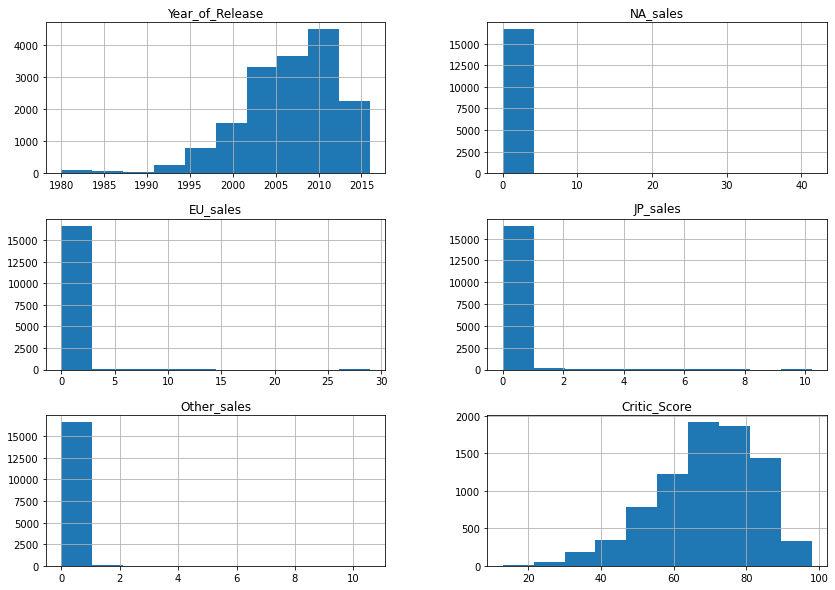

In [ ]:
#изучаю полученный датафрейм
display(df.tail(50))
df.info()
#строю общую гистограмму для всех числовых столбцов таблицы
df.hist(figsize=(14, 10))
plt.show()

В ходе первого шага были импортированы необходимые библиотеки, загружены данные, на основании которых в дальнейшем и будет проводиться исследование, а также было произведено первичное знакомство с датафреймом. <br>
На данный момент, до предобработки данных, датафрейм содержит 16715 строк и 11 столбцов, в 3 из которых (Critic_Score, User_Score, Rating) заметно большое количество пропущенных значений.

## Предобработка данных

###  Изменение названий столбцов

Для удобства пользования таблицей приведем названия всех столбцов к нижнему регистру.

In [ ]:
df.columns = df.columns.str.lower()

### Поиск и удаление дубликатов

Проверим данные на наличие явных дубликатов.

In [ ]:
df.duplicated().sum()

0

Теперь попробуем найти дубликаты по паре значений "название игры - платформа".

In [ ]:
df.loc[df.duplicated(subset=['name','platform']) == True]
#удаляем найденные 5 дубликатов
df = df.loc[df.duplicated(subset=['name','platform']) == False]

### Преобразование типов данных

Преобразуем типы данных для дальнейшей работы с ними. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16710 non-null  object 
 2   year_of_release  16442 non-null  float64
 3   genre            16709 non-null  object 
 4   na_sales         16710 non-null  float64
 5   eu_sales         16710 non-null  float64
 6   jp_sales         16710 non-null  float64
 7   other_sales      16710 non-null  float64
 8   critic_score     8133 non-null   float64
 9   user_score       10010 non-null  object 
 10  rating           9945 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Неоптимальный тип данных у столбцов *year_of_release* и *critic_score*, так как это целочисленные значения, но из-за наличия пропущенных значений у этих столбцов тип данных float. Также стоит попытаться изменить тип данных столбца *user_score*: это числовой показатель, необходимо выяснить причину появления типа данных object.

In [ ]:
#проверим долю пропущенных значений
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


В столбце *year_of_release* 2% пропущенных значений, удалим эти строки и преобразуем тип данных в int.

In [ ]:
df = df[~(df['year_of_release'].isna())]
df['year_of_release'] = df['year_of_release'].astype(int)

В столбце *critic_score* максимальное количество пропущенных значений (51%): удаление или произвольная замена такого большого количества данных приведет к искажению результатов исследования, поэтому придется оставить пропуски и тип данных float.

Теперь посмотрим внимательнее на столбец *user_score*.

In [ ]:
display(df.tail(50))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16665,Sweet Honey Coming,PS2,2009,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16666,Psychic Detective,PS,1995,Adventure,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16667,Hanasaku Manimani,PSV,2014,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16669,Super Robot Taisen: Original Generation,GBA,2002,Role-Playing,0.01,0.00,0.00,0.0,72.0,tbd,T
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16671,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.0,NaN,tbd,M
16673,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,0.01,0.00,0.00,0.0,81.0,8.8,M
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.0,NaN,NaN,NaN


In [ ]:
display(len(df[df['user_score'] == 'tbd']))

2376

В 2376 строках встречается значение *tbd* - to be determined, то есть фактически на данный момент это пропущенные значения, так как этих данных у нас нет. Поэтому лучше заменить tbd на NaN и поменять тип данных столбца на float.

In [ ]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

В остальных случаях тип данных менять не нужно. Перейдем к обработке пропущенных значений.

### Обработка пропущенных значений

In [ ]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16441 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           9765 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
#проверяем столбец name
display(df[df['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


В столбце *name* есть 1 пропуск, также это именно та строка, в которой пропущено значение *genre*. Так как такая строка всего одна, удалим ее. 

In [ ]:
display(df[df['name'].isna()])
df = df[~(df['name'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [ ]:
#восстанавливаю индекс строк после удаления части данных
df = df.reset_index(drop=True)

Остались только крупные пропуски в столбцах *critic_score*(51%), *user_score*(55%) и *rating*(41%). При замене такого большого количества пропущенных данных на какой-либо вычисляемый показатель результаты исследования будут искажены. Поэтому придется оставить пропущенные значения. Попытаемся понять, есть ли связь между пропущенными данными.

In [ ]:
display(f"Пропущена оценка критиков: {len(df[df['critic_score'].isna()])}")
display(f"Пропущена оценка пользователей: {len(df[df['user_score'].isna()])}")
display(f"Пропущен рейтинг: {len(df[df['rating'].isna()])}")
display(f"Пропущены оценки критиков и пользователей, и пропущен рейтинг: {len(df[(df['critic_score'].isna())& (df['user_score'].isna())&(df['rating'].isna())])}")
display(f"Пропущены оценки критиков и пользователей: {len(df[(df['critic_score'].isna())& (df['user_score'].isna())])}")

'Пропущена оценка критиков: 8461'

'Пропущена оценка пользователей: 8981'

'Пропущен рейтинг: 6676'

'Пропущены оценки критиков и пользователей, и пропущен рейтинг: 6580'

'Пропущены оценки критиков и пользователей: 7892'

Изначально пропуски были в шести столбцах: *name*, *year_of_release*, *genre*, *critic_score*, *user_score* и *rating*. В отличие от малочисленных и вероятно случайных пропусков в первых трех столбцах, пропуски во второй тройке взаимосвязаны: в подавляющем большинстве случаев все три пропуска случаются совместно. Нам известно, что данные за 2016 год неполные. Проверим гипотезу, согласно которой многочисленные пропуски связаны с годом выхода игры.

In [ ]:
display(len(df[(df['critic_score'].isna())& (df['user_score'].isna())& \
               (df['rating'].isna())&(df['year_of_release']==2016)])) 
display(len(df[(df['critic_score'].isna())& (df['user_score'].isna())& \
               (df['year_of_release']==2016)])) 
display(len(df[df['year_of_release'] == 2016]))
display(df['critic_score'].corr(df['year_of_release']))

206

235

502

0.011202031917877343

Гипотеза не подтвердилась. Следовательно, связи между пропущенными данными и годом выхода игры нет. Попробуем найти взаимосвязь с каким-либо другим показателем из таблицы.

In [ ]:
#делаю срез данных через создание отдельного датафрейма, ищу взаимосвязь с другими параметрами таблицы 
df2 = df[(df['critic_score'].isna())& (df['user_score'].isna())&(df['rating'].isna())]
display(df2['name'].value_counts())
display(df2['year_of_release'].value_counts())
display(df2['platform'].value_counts())
display(df2['genre'].value_counts())

The Amazing Spider-Man 2 (2014)                  7
FIFA 12                                          7
Avatar: The Game                                 6
FIFA Soccer 07                                   6
The Walking Dead: Season One                     6
                                                ..
Vantage Master Portable                          1
Jissen Pachislot Hisshouhou! Hokuto no Ken DS    1
Brigandine: The Legend of Forsena                1
Doubutsu no Mori                                 1
Slam Dunk SD Heat Up!!                           1
Name: name, Length: 5698, dtype: int64

2010    453
2008    440
2011    419
2009    408
2007    375
1998    346
2006    327
1999    296
2012    290
2015    273
1997    268
1996    255
2005    232
2014    231
2013    222
1995    219
2016    206
2000    200
2002    174
2003    161
2004    161
2001    143
1994    120
1993     60
1981     46
1991     41
1992     41
1982     36
1986     21
1983     17
1989     17
1990     16
1987     16
1984     14
1988     14
1985     13
1980      9
Name: year_of_release, dtype: int64

PS      981
DS      864
PS2     671
PSP     656
PS3     361
N64     316
Wii     306
GBA     297
3DS     288
PSV     279
SNES    239
X360    196
SAT     173
PC      156
PS4     125
2600    116
NES      98
GB       97
GC       85
XB       85
XOne     53
WiiU     42
DC       38
GEN      27
NG       12
SCD       6
WS        6
3DO       3
TG16      2
PCFX      1
GG        1
Name: platform, dtype: int64

Action          1140
Misc             857
Adventure        833
Sports           814
Role-Playing     708
Fighting         403
Racing           360
Strategy         330
Platform         317
Shooter          295
Simulation       292
Puzzle           231
Name: genre, dtype: int64

Не удалось найти взаимосвязь между многочисленными пропущенными значениями в трех столбцах и другими показателями таблицы. Можно предположить, что данные об этих играх были загружены с одного и того же стороннего сайта, на котором могли отсутствовать данные по конкретно этим показателям, либо же могла произойти какая-то техническая ошибка вследствие которой данные могли быть утеряны. 

Для удобства дальнейшей работы с датафреймом заменим пропущенные значения в столбце rating на значение "NR" - Not Rated.

In [ ]:
df['rating'] = df['rating'].fillna('NR')

### Добавление нового столбца

Добавим стоблец с суммарными продажами во всех регионах.

In [ ]:
df['global_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

На данном этапе исследования основной задачей было выполнение предобработки данных для получения более четких и репрезентативных результатов исследовательского анализа. Название всех столбцов были приведены к нижнему регистру. Датафрейм был проверен на наличие явных дубликатов и дубликатов по паре значений "название игры - платформа". Были обработаны пропущенные значения, а именно были удалены строки с малочисленными пропусками и проанализированы случаи многочисленных пропусков, которые решено было не заполненять во избежание риска искажения данных. Пропущенные значения в столбце rating были выделены в отдельную категорию с помощью замены значений на NR - Not Rated. Была произведена смена типов данных для удобства дальнейшей работы с ними в тех случаях, когда это было возможно. Был добавлен столбец с суммарными продажами во всех регионах. <br>
Необходимо отметить, что на данном этапе наибольшие трудности вызывали многочисленные одновременные пропуски в трех столбцах (*critic_score*, *user_score*, *rating*), которые в первых двух случаях пришлось сохранить, что необходимо будет учитывать при формировании выводов исследования.

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы?

Рассмотрим подробнее данные о годе выпуска игр. 

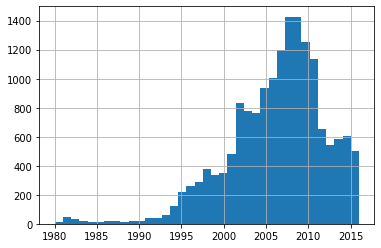

<AxesSubplot:>

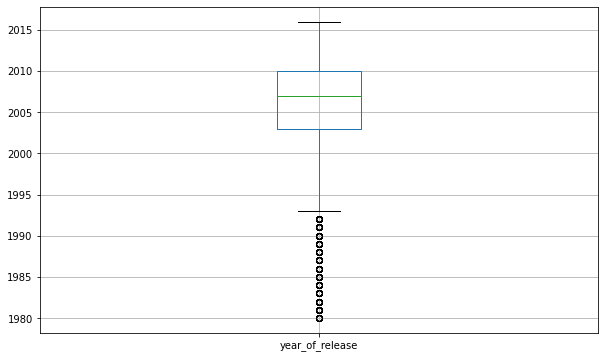

In [ ]:
#строю гистограмму, чтобы посмотреть на распределение значений, для этого задаю необходимые параметры
df['year_of_release'].hist(bins=37,range=(1980,2016))
plt.show()
#строю boxplot, чтобы определить выбросы
df.boxplot(column=['year_of_release'],figsize=(10,6),grid=True)

Пиковые значения приходятся на период 2005-2010 гг., после чего количество выпускаемых ежегодно игр заметно снизилось. <br> 
В исследуемой выборке количество игр, выпущенных до 1993 года, незначительно, и эти значения будут считаться выбросами, от которых можно избавиться. Данные за 2016 г. могут быть неполными, однако, они имеют важное значение при построении прогнозов на 2017 г., поэтому удалять их нельзя, лучше просто учитывать, что они не содержат окончательную информацию за весь год.

In [ ]:
df = df[df['year_of_release'] > 1992]

### Как менялись продажи по платформам?

Теперь посмотрим на то, как менялись продажи игр по платформам. Оценим наиболее популярные из них и выясним, как быстро появляются новые и исчезают старые платформы.

,platform,sum
14,PS2,1233.56
26,X360,959.99
15,PS3,931.33
24,Wii,891.18
3,DS,802.76
13,PS,727.58
16,PS4,314.14
5,GBA,312.88
17,PSP,289.53
1,3DS,257.81


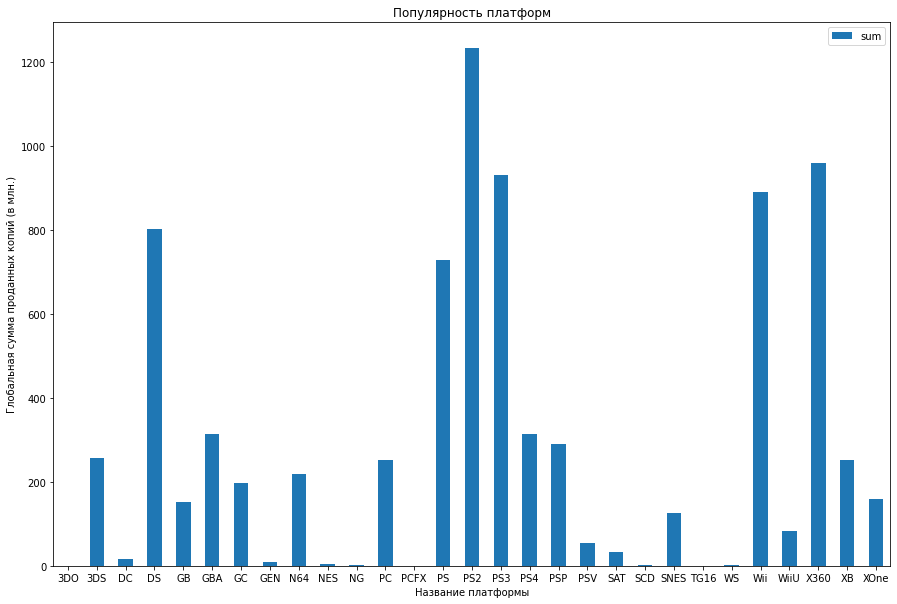

In [ ]:
#с помощью сводной таблицы оцениваю сумму глобальных продаж на каждой из платформ, иллюстрирую данные графиком
platform_pivot = df.pivot_table(index='platform', values='global_sales', aggfunc=['sum']).reset_index()
platform_pivot = platform_pivot.droplevel(1,axis=1)
display(platform_pivot.sort_values('sum',ascending=False))
platform_pivot.plot.bar(x='platform',y='sum',figsize=(15,10), \
      title='Популярность платформ',xlabel='Название платформы',ylabel='Глобальная сумма проданных копий (в млн.)')
plt.xticks(rotation = 0)
plt.show()

Посмотрим, как менялись продажи с течением времени у 10 самых популярных платформ. 

In [ ]:
#создаю новую таблицу с топовыми платформами и суммой глобальных продаж 
platform_top = df[df['platform'].isin(['PS2','X360','PS3','Wii','DS','PS','PC','GBA','PSP','XB'])]
top_sales = platform_top.merge(platform_pivot,on='platform', how='outer')

In [ ]:
#display(top_sales.tail(50))
#удаляю лишние строки, возвращает тип данных int столбцу с годом выхода игры
top_sales = top_sales[~(top_sales['name'].isna())]
top_sales['year_of_release'] = top_sales['year_of_release'].astype('int')

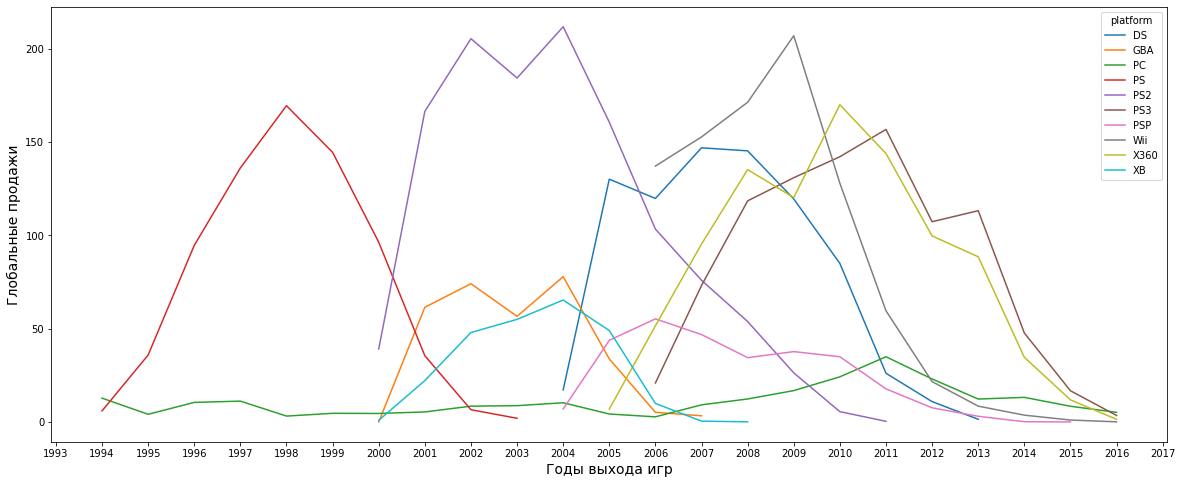

In [ ]:
#строю график на основании полученных данных
top_sales_pivot = top_sales.pivot_table(index=['platform','year_of_release'],values='global_sales',aggfunc='sum')
fig, ax = plt.subplots(1, figsize=(20, 8))
sns.lineplot(data=top_sales_pivot, x='year_of_release', y='global_sales', hue='platform')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_xlabel('Годы выхода игр', fontsize = 14)
ax.set_ylabel('Глобальные продажи', fontsize = 14)
plt.show()

На графике видно, что всплеск появления новых популярных платформ с рекордными глобальными продажами пришелся на 2000-е годы. Жизненный цикл платформы составляет приблизительно 10 лет. Резкое снижение популярности происходит примерно через 4 года после появления самой платформы. Таким образом, пиковый период популярности составляет 2-3 года. 

### Выбор актуального периода

В рамках данного исследования в дальнейшем мы будем рассматривать данные за актуальный период, так как именно на основании него имеет смысл делать прогнозы на следующий год. На основании предыдущих вычислений можно сделать вывод о том, что актуальный период в данном случае - это последние 3 года. Так как данные за 2016 год могут быть неполными, оставим данные за 4 года (2013-2016 гг.). Остальные данные нам не нужны, поэтому их удаляем. 

In [ ]:
df = df[df['year_of_release'] > 2012]
df = df.reset_index(drop= True)

### Какие платформы лидируют по продажам, растут или падают? 

Посмотрим на динамику глобальных продаж на всех платформах за актуальный период.

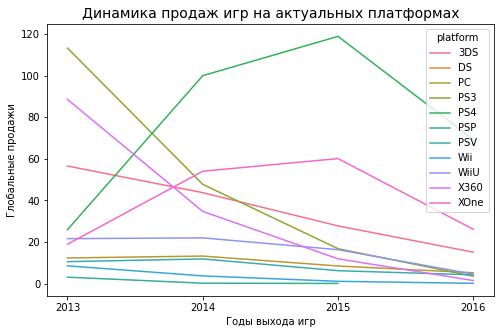

In [ ]:
#c помощью сводной таблицы строю линейный график и отслеживаю динамику продаж всех платформ за актуальный период
plot_df = df.groupby(['platform','year_of_release'], as_index=False)['global_sales'].sum()
fig, ax = plt.subplots(1, figsize=(8, 5))
sns.lineplot(data=plot_df, x='year_of_release', y='global_sales', hue='platform')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_xlabel('Годы выхода игр', fontsize = 10)
ax.set_ylabel('Глобальные продажи', fontsize = 10)
ax.set_title('Динамика продаж игр на актуальных платформах', fontsize = 14)
plt.show()

Так как данные за 2016 года неполные, падение значений относительно 2015 г. не означает снижение популярности. На графике видно, что PS4 является потенциально прибыльной платформой с очень хорошей тенденцией роста глобальных продаж. Также на данном графике заметна положительная тендцения в росте популярности XOne. Продажи игр на данной платформе пока не имеют такого стремительного взрывного характера роста как у PS4, тем не менее, именно XOne наряду с PS4 является потенциально прибыльной платформой. Даже по неполным данным за 2016 г. эти платформы превосходят остальные. <br>
Резко отрицательную динамику в указанный период демонстрируют PS3 и X360, их можно охарактеризовать как теряющие популярность платформы.

### Диаграмма размаха глобальных продаж в разбивке по платформам

Посмотрим на диаграмму размаха глобальных продаж в разбивке по платформам.

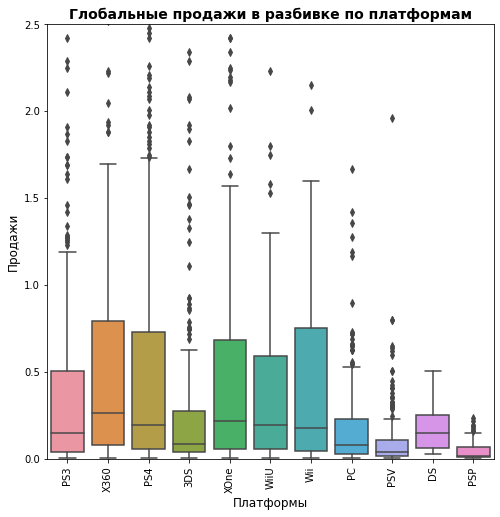

In [ ]:
#строю диаграмму размаха
platform_sales = df.groupby('platform')['global_sales'].sum()
fig, ax = plt.subplots(1, figsize=(8, 8))
sns.set_style('whitegrid')
sns.boxplot(data=df, x='platform', y='global_sales')
ax.set_ylim([0, 2.5])
ax.set_xlabel('Платформы', fontsize = 12)
ax.set_ylabel('Продажи', fontsize = 12)
ax.set_title('Глобальные продажи в разбивке по платформам',fontsize = 14, fontweight ="bold")
plt.xticks(rotation = 90)
plt.show()

На графике можно увидеть, что медиана самых популярных платформ находится примерно на одном уровне. Платформы, у которых был резкий рост популярности, демонстрируют большое число нетипичных значений, которые можно охарактеризовать как выбросы. Наибольшее количество аномально высоких значений у PS3, PS4, X360, 3DS и PC.

### Как влияют на продажи актуальных платформ отзывы пользователей и критиков?

Теперь рассмотрим, как влияют на продажи игр одной из популярных платформ отзывы пользователей и критиков. 

-0.031957110204556376

<AxesSubplot:xlabel='user_score', ylabel='global_sales'>

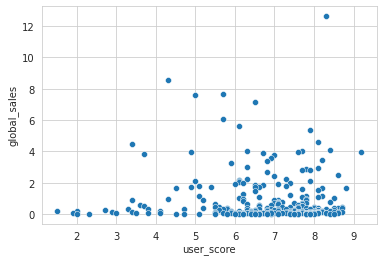

In [ ]:
#считаю корреляцию между отзывами пользователей и глобальными продажами и строю график рассеивания
display(df[df['platform']=='PS4']['user_score'].corr(df[df['platform']=='PS4']['global_sales']))
sns.scatterplot(x=df[df['platform']=='PS4']['user_score'], y = df[df['platform']=='PS4']['global_sales'])

0.40656790206178095

<AxesSubplot:xlabel='critic_score', ylabel='global_sales'>

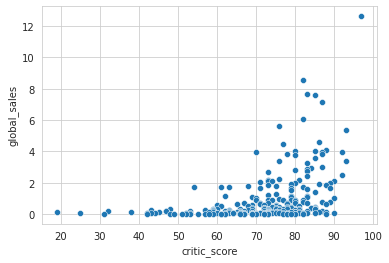

In [ ]:
#то же самое с отзывами критиков
display(df[df['platform']=='PS4']['critic_score'].corr(df[df['platform']=='PS4']['global_sales']))
sns.scatterplot(x=df[df['platform']=='PS4']['critic_score'], y = df[df['platform']=='PS4']['global_sales'])

В случае платформы PS4 корреляция между отзывами пользователей и глобальными продажами фактически отсутствует, тогда как взаимосвязь между отзывами критиков и глобальными продажами есть, пусть и не сильная. 
Коэффициент корреляции 0.43 свидетельствует о наличии **очень слабой** прямой связи, однако на графике рассеяния мы видим, что, несмотря на то, что даже с высокой оценкой критиков у платформы могут быть низкие показатели продаж, обратная ситуация практически не наблюдается: по мере роста оценок критиков постепенно растет и вероятность увидеть большее число проданных копий. 

Посмотрим на аналогичные коэффициенты корреляции у других актуальных платформ.

In [ ]:
#считаю коэффициенты корреляции 
display(df.groupby('platform')['user_score'].corr(df['global_sales']))
display(df.groupby('platform')['critic_score'].corr(df['global_sales']))

platform
3DS     0.241504
DS           NaN
PC     -0.093842
PS3     0.002394
PS4    -0.031957
PSP    -1.000000
PSV     0.000942
Wii     0.682942
WiiU    0.419330
X360   -0.011742
XOne   -0.068925
Name: user_score, dtype: float64

platform
3DS     0.357057
DS           NaN
PC      0.196030
PS3     0.334285
PS4     0.406568
PSP          NaN
PSV     0.254742
Wii          NaN
WiiU    0.376415
X360    0.350345
XOne    0.416998
Name: critic_score, dtype: float64

Для некоторых платформ не удалось произвести вычисления, так как либо отсутствуют данные об оценках критиков и пользователей, либо количество игр слишком маленькое для того, чтобы делать выводы о наличии или отсутствии взаимосвязи между изучаемыми показателями (например, в случае платформ Wii и WiiU). <br>
У остальных рассмотренных платформ сложилась схожая между собой картина: коррелция между отзывами пользователей и глобальными продажами фактически отсутствует, между отзывами критиков и глобальными продажами - в ряде случаев есть **очень слабая** прямая взаимосвязь, заметнее всего проявляющаяся у PS4 и ХOne.

### Какие жанры можно назвать прибыльными и популярными, а какие нет?

Посмотрим на распределение игр по жанрам и попытаемся выявить самые популярные жанры.

Для начала посмотрим на то, в каких жанрах выходит больше всего игр.

,name
genre,
Action,766
Role-Playing,292
Adventure,245
Sports,214
Shooter,187
Misc,155
Racing,85
Fighting,80
Platform,74


<AxesSubplot:xlabel='genre'>

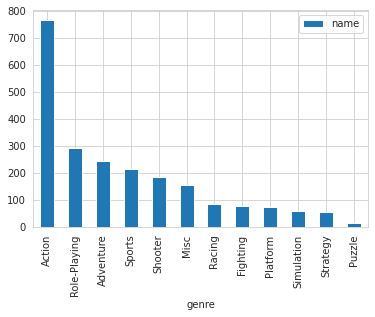

In [ ]:
#считаю количество игр в разбивке по жанрам и строю график
genre_number_stat = df.pivot_table(index='genre',values='name',aggfunc='count')
display(genre_number_stat.sort_values(by='name',ascending=False))
genre_number_stat.sort_values(by='name',ascending=False).plot(kind='bar')

Теперь посмотрим на взаимосвязь между жанром и глобальными продажами. 

,global_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


<AxesSubplot:xlabel='genre'>

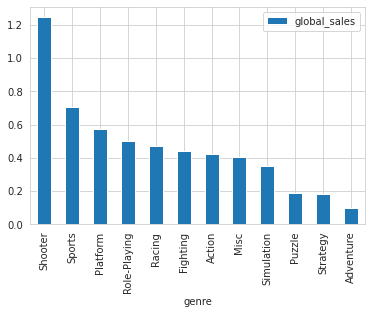

In [ ]:
#считаю средние продажи игр каждого жанра
genre_sales_stat = df.pivot_table(index='genre',values='global_sales',aggfunc='mean')
display(genre_sales_stat.sort_values(by='global_sales',ascending=False))
genre_sales_stat.sort_values(by='global_sales',ascending=False).plot(kind='bar')

И наконец посмотрим на то, какие жанры наиболее популярны, согласно оценкам пользователей.

,user_score
genre,
Puzzle,7.471429
Adventure,7.461667
Role-Playing,7.376471
Fighting,7.037500
Misc,6.975000
Action,6.837532
Platform,6.713793
Shooter,6.342308
Strategy,6.183333


<AxesSubplot:ylabel='genre'>

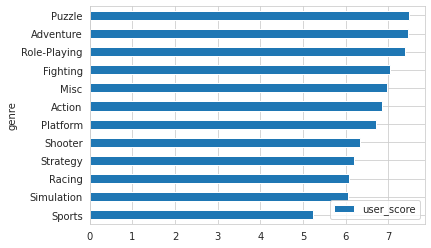

In [ ]:
#считаю средний рейтинг в разбивке по жанрам
genre_user_score_stat = df.pivot_table(index='genre',values='user_score',aggfunc='mean')
display(genre_user_score_stat.sort_values(by='user_score',ascending=False))
genre_user_score_stat.sort_values(by='user_score').plot(kind='barh')

Большинство игр выходит в жанрах Action, Role-Playing, Adventure, Sports и Shooter. Наименьшее количество игр представлены жанрами Puzzle и Strategy. <br>
Маленькая выборка игр жанра Puzzle может объяснить самый высокий из имеющихся показателей средней оценки пользователей (аналогично с очень низкой средней оценкой игр жанра Strategy), так как чем меньше выборка, тем больше ее показатели подвержены искажению выбросами. <br>
Исходя из показателей средних продаж, самыми прибыльными жанрами являются Shooter и Sports, далее с большим отрывом следуют Platform и Role-Playing. Остальные жанры еще менее прибыльные, с наименьшими показателями продаж у Simulation, Adventure, Puzzle и Strategy. При этом именно в жанре Adventure выходит сравнительно много игр, поэтому по соотношению количества вышедших игр и принесенной прибыли именно этот жанр является антилидером.

В данном разделе был проведен исследовательский анализ данных: выявлен актуальный период, в границах которого и проводились дальнейшие расчеты, проанализированы крупнейшие платформы и рассмотрены тенденции их популярности, рассмотрены взаимосвязи между прибылью, приносимой играми на тех или иных платформах, и отзывами пользователей и критиков. Также была изучена популярность отдельных игровых жанров. 

## Составление портрета пользователя каждого региона

Рассмотрим различные показатели и соотношения для пользователей из каждого представленного региона.

Для начала оценим долю проданных копий в каждом из регионов. 

In [ ]:
#считаю долю проданных копий игр в каждом регионе
regions_sales_sum = df['na_sales'].sum() + df['eu_sales'].sum() + df['jp_sales'].sum()
na_sales_sum = df['na_sales'].sum()
na_sales_mean = round(na_sales_sum / regions_sales_sum *100)
display(f'В Северной Америке продано {na_sales_mean}% игр.')
eu_sales_sum = df['eu_sales'].sum()
eu_sales_mean = round(eu_sales_sum / regions_sales_sum * 100)
display(f'В Европе продано {eu_sales_mean}% игр.')
jp_sales_sum = df['jp_sales'].sum()
jp_sales_mean = round(jp_sales_sum / regions_sales_sum * 100)
display(f'В Японии продано {jp_sales_mean}% игр.')

'В Северной Америке продано 45% игр.'

'В Европе продано 40% игр.'

'В Японии продано 15% игр.'

Получается, что количество проданных игр в Северной Америке и Европе сопоставимо, тогда как в Японии данный показатель существенно меньше.

### Самые популярные платформы в каждом регионе

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

<AxesSubplot:>

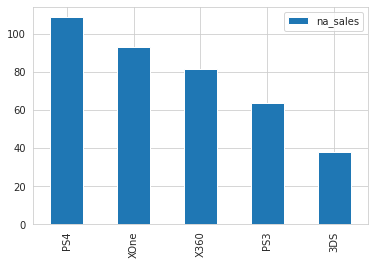

In [ ]:
#определяю самые популярные платформы в Северной Америке
na_top_platforms = df.groupby('platform')['na_sales'].sum()
na_top5_platforms = na_top_platforms.sort_values(ascending=False).head(5)
display(na_top5_platforms)
na_platforms_plotdata = pd.DataFrame(
    {'na_sales': [108.74, 93.12, 81.66, 63.50, 38.20]}, 
    index=['PS4','XOne', 'X360', 'PS3', '3DS'])
na_platforms_plotdata.plot(kind="bar")

Топ-5 популярных платформ в Северной Америке: PS4, XOne, X360, PS3 и 3DS. <br>
Первые три платформы практически сопоставимы по прибыльности, тогда как 3DS почти что в два раза уступает четверой по популярности платформе - PS3.

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

<AxesSubplot:>

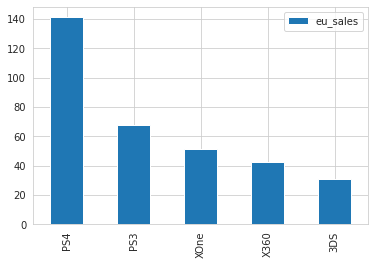

In [ ]:
#определяю самые популярные платформы в Европе
eu_top_platforms = df.groupby('platform')['eu_sales'].sum()
eu_top5_platforms = eu_top_platforms.sort_values(ascending=False).head(5)
display(eu_top5_platforms)
eu_platforms_plotdata = pd.DataFrame(
    {'eu_sales': [141.09, 67.81, 51.59, 42.52, 30.96]}, 
    index=['PS4', 'PS3','XOne', 'X360', '3DS'])
eu_platforms_plotdata.plot(kind="bar")

В Европе топ-5 популярных платформ представлен теми же платформами, что и в Северной Америке, однако, порядок разнится: PS4, PS3, XOne, X360, 3DS. Стоит отметить, что в данном случае есть определенный лидер по продажам - PS4, у следующей же платформы - PS3 - продаж в 2 раза меньше, далее следуют с практически одинаковыми показателями XOne и X360 и, как и в Северной Америке, на пятом месте находится платформа 3DS.

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

<AxesSubplot:>

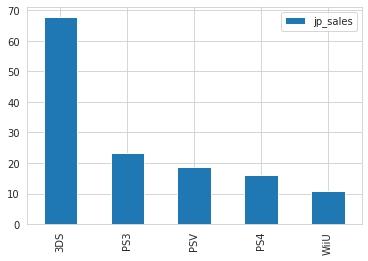

In [ ]:
#определяю самые популярные платформы в Японии
jp_top_platforms = df.groupby('platform')['jp_sales'].sum()
jp_top5_platforms = jp_top_platforms.sort_values(ascending=False).head(5)
display(jp_top5_platforms)
jp_platforms_plotdata = pd.DataFrame(
    {'jp_sales': [67.81, 23.35, 18.59, 15.96, 10.88]}, 
    index=['3DS', 'PS3','PSV', 'PS4', 'WiiU'])
jp_platforms_plotdata.plot(kind="bar")

В Японии картина значительно отличается: на первом месте со значительным отрывом находится 3DS, далее расположены PS3 и PSV, замыкают топ-5 PS4 и WiiU с практически идентичными показателями. Стоит отметить, что в отличие от предыдущих регионов в японском топе нет XOne и X360, зато появляются PSV и WiiU. 

### Самые популярные жанры в каждом регионе

Теперь посмотрим на самые популярные жанры в каждом из регионов.

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

<AxesSubplot:>

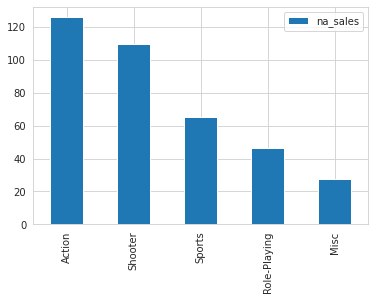

In [ ]:
#определяю самые популярные жанры в Северной Америке
na_top_genre = df.groupby('genre')['na_sales'].sum()
na_top5_genre = na_top_genre.sort_values(ascending=False).head(5)
display(na_top5_genre)
na_genre_plotdata = pd.DataFrame(
    {'na_sales': [126.05, 109.74, 65.27, 46.40, 27.49]}, 
    index=['Action', 'Shooter','Sports', 'Role-Playing', 'Misc'])
na_genre_plotdata.plot(kind="bar")

В Северной Америке лидирует жанр Action, с относительно небольшим отрывом за ним следует жанр Shooter, далее с большим отрывом идут игры жанра Sports и примерно сопоставимые по популярности игры Role-Playing. Замыкает топ-5 жанр Misc.

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

<AxesSubplot:>

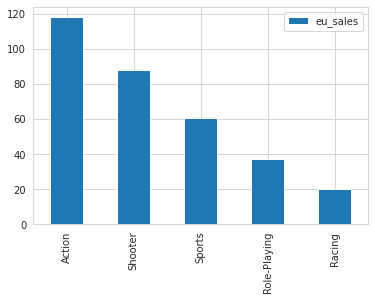

In [ ]:
#определяю самые популярные жанры в Европе
eu_top_genre = df.groupby('genre')['eu_sales'].sum()
eu_top5_genre = eu_top_genre.sort_values(ascending=False).head(5)
display(eu_top5_genre)
eu_genre_plotdata = pd.DataFrame(
    {'eu_sales': [118.13, 87.86, 60.52, 36.97, 20.19]}, 
    index=['Action', 'Shooter','Sports', 'Role-Playing', 'Racing'])
eu_genre_plotdata.plot(kind="bar")

Европейский топ-5 аналогичен североамериканскому по всем параметрам кроме последнего места в топе-5: вместо Misc в Европе популярен жанр Racing.

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

<AxesSubplot:>

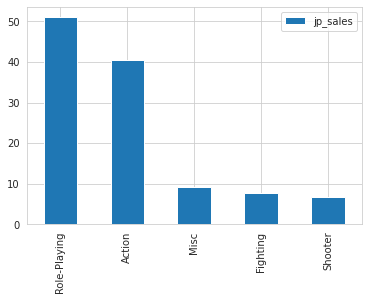

In [ ]:
#определяю самые популярные жанры в Японии
jp_top_genre = df.groupby('genre')['jp_sales'].sum()
jp_top5_genre = jp_top_genre.sort_values(ascending=False).head(5)
display(jp_top5_genre)
jp_genre_plotdata = pd.DataFrame(
    {'jp_sales': [51.04, 40.49, 9.20, 7.65, 6.61]}, 
    index=['Role-Playing', 'Action','Misc', 'Fighting', 'Shooter'])
jp_genre_plotdata.plot(kind="bar")

Как и в вопросе выбора платформ, жанровые предпочтения японских пользователей сильно отличаются от западных. На первом месте жанр Role-Playing, далее следует жанр Action. После них со значительным падением показателей популярности расположены жанры Misc, Fighting и Shooter. В японском топ-5 отсутствует жанр Sports, зато появляется жанр Fighting.

### Влияет ли рейтинг ESRB на продажи в каждом из регионов?

Теперь посмотрим на то, влияет ли рейтинг ESRB на продажи в каждом из регионов.

rating
M       165.21
NR       89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

<AxesSubplot:>

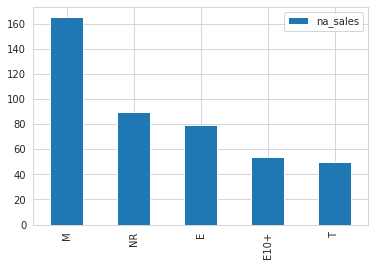

In [ ]:
#определяю взаимосвязь между рейтингом ESRB на продажами в Северной Америке
na_rating = df.groupby('rating')['na_sales'].sum()
display(na_rating.sort_values(ascending=False))
na_rating_plotdata = pd.DataFrame(
    {'na_sales': [165.21, 89.42, 79.05, 54.24, 49.79]}, 
    index=['M', 'NR', 'E','E10+', 'T'])
na_rating_plotdata.plot(kind="bar")

Однозначным лидером среди североамериканских пользователей являются игры с рейтингом М - для взрослых, далее следуют игры без рейтинга, затем жанра E - игры для всех. Игры "для всех от 10 лет и старше" и для подростков имеют наименьшую популярность.

rating
M       145.32
E        83.36
NR       78.91
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

<AxesSubplot:>

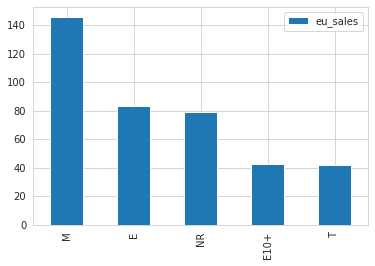

In [ ]:
#определяю взаимосвязь между рейтингом ESRB на продажами в Европе
eu_rating = df.groupby('rating')['eu_sales'].sum()
display(eu_rating.sort_values(ascending=False))
eu_rating_plotdata = pd.DataFrame(
    {'eu_sales': [145.32, 83.36, 78.91, 42.69, 41.95]}, 
    index=['M', 'E','NR','E10+','T'])
eu_rating_plotdata.plot(kind="bar")

Распределение аналогично североамериканскому.

rating
NR      85.05
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64

<AxesSubplot:>

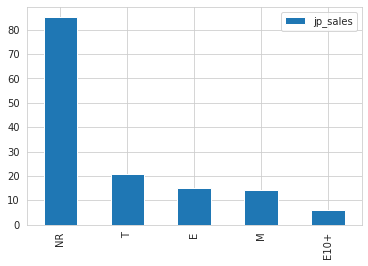

In [ ]:
#определяю взаимосвязь между рейтингом ESRB на продажами в Японии
jp_rating = df.groupby('rating')['jp_sales'].sum()
display(jp_rating.sort_values(ascending=False))
jp_rating_plotdata = pd.DataFrame(
    {'jp_sales': [85.05, 20.59, 15.14, 14.11, 5.89]}, 
    index=['NR', 'T', 'E','M', 'E10+'])
jp_rating_plotdata.plot(kind="bar")

В Японии наибольшую популярность имеют игры без рейтинга, далее с огромным отставанием в показателях следуют игры для подросткоов, затем c небольшим падением популярности и с примерно одинаковыми показателями следуют игры для всех и взрослых, на последнем месте игры для всех от 10 лет и старше.

В результате проведенных расчетов с уверенностью можно сказать, что предпочтения японских пользователей сильно отличаются от весьма схожих между собой потребительских выборов европейских и североамериканских игроков. <br>
В Северной Америке и Европе лидируют одни и те же платформы, тогда как в Японии топ-5 сильно отличается. <br>
PS4, являющаяся лидером на Западе, занимает лишь 4 место в Японии, а на первом месте в японском топе 3DS, у которой лишь 5 место и в Северной Америке, и в Европе. В Японии в топ-5 не вошли популярные на Западе XOne и X360, зато в нем есть PSV и WiiU, которые не вошли в западные топ-5. Стоит также отметить, что наибольшая доля проданных игр приходится на Северную Америку. Сопоставимое количество копий было продано в Европе, а вот в Японии доля продаж существенно меньше. <br>
Жанровые предпочтения североамериканских и европейских пользователей совпадают: они предпочитают жанры Action, Shooter, Sports, Role-Playing и Misc. Японские же игроки предпочитают жанры Role-Playing, Action, Misc, Fighting и Shooter. <br>
В Европе и Северной Америке наибольшей популярностью пользуются игры с рейтингом ESRB - M - для взрослых, далее следуют игры без рейтинга и игры для всех, cледом идут игры с рейтингом "для всех от 10 лет и старше" и наименьшей популярностью пользуются игры для подростков. В Японии же предпочтения пользователей сильно отличаются: на первом месте с огромным отрывом от всех остальных категорий значатся игры без рейтинга, затем по мере постепенного уменьшения популярности идут игры для подростков, игры для всех, игры для взрослых и на последнем месте игры с рейтингом "для всех от 10 лет и старше". <br>
Разницу в популярности игр с разным рейтингом можно объяснить тем, что ESRB - это североамериканская рейтинговая система, и логично предположить, что рейтинг присваивается в первую очередь популярным на Западе играм и играм, выпущенным в западных странах. В Японии же есть своя рейтинговая система - CERO. Можно предположить, что многие игры, которые стали популярными в Японии, могут быть не переведены на английский язык или же вовсе не быть представленными на западных рынках, в связи с чем они могут не попасть в поле зрения ESRB и не получить оценку экспертов.

## Проверка гипотез

### Проверка первой гипотезы

На данном этапе исследования проверим две гипотезы. Согласно первой гипотезе, *средние пользовательские рейтинги платформ Xbox One и PC одинаковые*.
```
H0: Пользовательский рейтинг (user_score) платформы (platform) Xbox One = пользовательский рейтинг (user_score) платформы (platform) PC
H1: Пользовательский рейтинг (user_score) платформы (platform) Xbox One ≠ пользовательский рейтинг (user_score) платформы (platform) PC
```

In [ ]:
#убираю строки с nan в используемом для проверки столбце
df = df[~(df['user_score'].isna())] 

s1 = df[df['platform'] == 'XOne']['user_score']
s2 = df[df['platform'] == 'PC']['user_score']

#вызываю метод для проверки гипотез о равенстве средних двух генеральных совокупностей
results = st.ttest_ind(s2, s1, equal_var=False)

#задаю уровень значимости, выбираю стандартный порог - 5%
alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


В результате произведенных расчетов мы получаем значение p-value равное 0.15. Это означает, что вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна, равен 15%. Пороговое значение в рамках данного исследования - 5%, в связи с чем мы не можем отвергнуть нулевую гипотезу, согласно которой средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Проверка второй гипотезы

Согласно второй гипотезе, *средние пользовательские рейтинги жанров Action и Sports разные.*
```
H0: Пользовательский рейтинг (user_score) жанра (genre) Action = пользовательский рейтинг (user_score) жанра(genre) Sports
H1: Пользовательский рейтинг (user_score) жанра (genre) Action ≠ пользовательский рейтинг (user_score) жанра(genre) Sports
```

In [ ]:
s1 = df[df['genre'] == 'Action']['user_score']
s2 = df[df['genre'] == 'Sports']['user_score']

#вызываю метод для проверки гипотез о равенстве средних двух генеральных совокупностей
results = st.ttest_ind(s2, s1, equal_var=False)

#задаю уровень значимости, выбираю стандартный порог - 5%
alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


По итогам расчетов можно подтвердить, что средние пользовательские рейтинги жанров Action и Sports разные. Нулевая гипотеза, согласно которой это не так, имеет ничтожно маленькую вероятность (~0.0000000000000000014%) воплотиться в реальности, поэтому можно отвергнуть эту гипотезу. 

В рамках данного этапа исследования было проверено две гипотезы: 
```
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
2) Средние пользовательские рейтинги жанров Action и Sports разные. 
```
Обе гипотезы оказались опровергнуть не удалось. 

## Выводы и рекомендации

Главной целью проведенного исследования было определить факторы и закономерности, влияющие на коммерческий успех видеоигр. В результате проведенных расчетов можно сделать следующие выводы: <br>
1. Актуальный период, показатели которого следует учитывать при построении прогнозов на ближайшее будущее при анализе продаж видеоигр, составляет 2-3 года. При этом жизненный цикл игровых платформ - приблизительно 10 лет.
2. Положительную динамику роста популярности и прибыльности демонстрируют две платформы: PS4 и Xbox One.
3. Не удалось выявить связи между пользовательскими оценками игр и количеством проданных копий, тогда как оценки критиков и объем продаж демонстрируют очень слабую прямую связь. 
4. Наиболее прибыльными жанрами видеоигр является Shooter и Sports.
5. Предпочтения западных (североамериканских и европейских) игроков и покупателей из Японии существенно отличаются: в этих регионах популярны разные игровые платформы, разные жанры и игры с разным рейтингом ESRB. Североамериканские и европейские пользователи, в свою очередь, очень схожи в пользовательском поведении. 
6. По итогам исследования не удалось опровергнуть гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports отличаются друг от друга. 

**Рекомендации** 
  1. Обратить внимание в первую очередь на игры, выходящие для актуальных платмформ с положительной динамикой роста продаж, - PS4 и Xbox One. Так же, несмотря на то, что популярность следующих платформ идет на спад, их все еще можно считать актуальными: PS3, X360, 3DS.
  2. Отдавать предпочтение наиболее прибыльным жанрам: Shooter, Sports, осторожно относиться к наименее прибыльным жанрам - Puzzle, Strategy и, особенно, Adventure.
  3. Ознакомиться с получившимися портретами пользователей из каждого региона и применить эти данные в соответствии с регионом целевой аудиторией магазина. Для североамериканского потребителя наиболее интересными будут игры на плафтормах PS4, Xbox One и X360, в жанрах Action, Shooter и Sports и с рейтингом для взрослых, для всех или без рейтинга. Европейская аудитория предпочитает игры на платформах PS4, PS3 и Xbox One, в жанрах Action, Shooter и Sports, с рейтингами для врослых, для всех или без рейтинга. В Японии наибольший спрос будет на игры на платформах 3DS, PS3 и PSV, в жанрах Role-Playing, Action и Misc, без рейтинга ESRB.